In [4]:
!nvidia-smi

Sat May 13 02:14:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [5]:
import ultralytics
ultralytics.checks()
     

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [9]:
!ls

data.yaml	      runs	   yolov8n.pt			  yolov8s.pt
laptop_mouse_dataset  ultralytics  yolov8-object-detection.ipynb


In [10]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=640 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

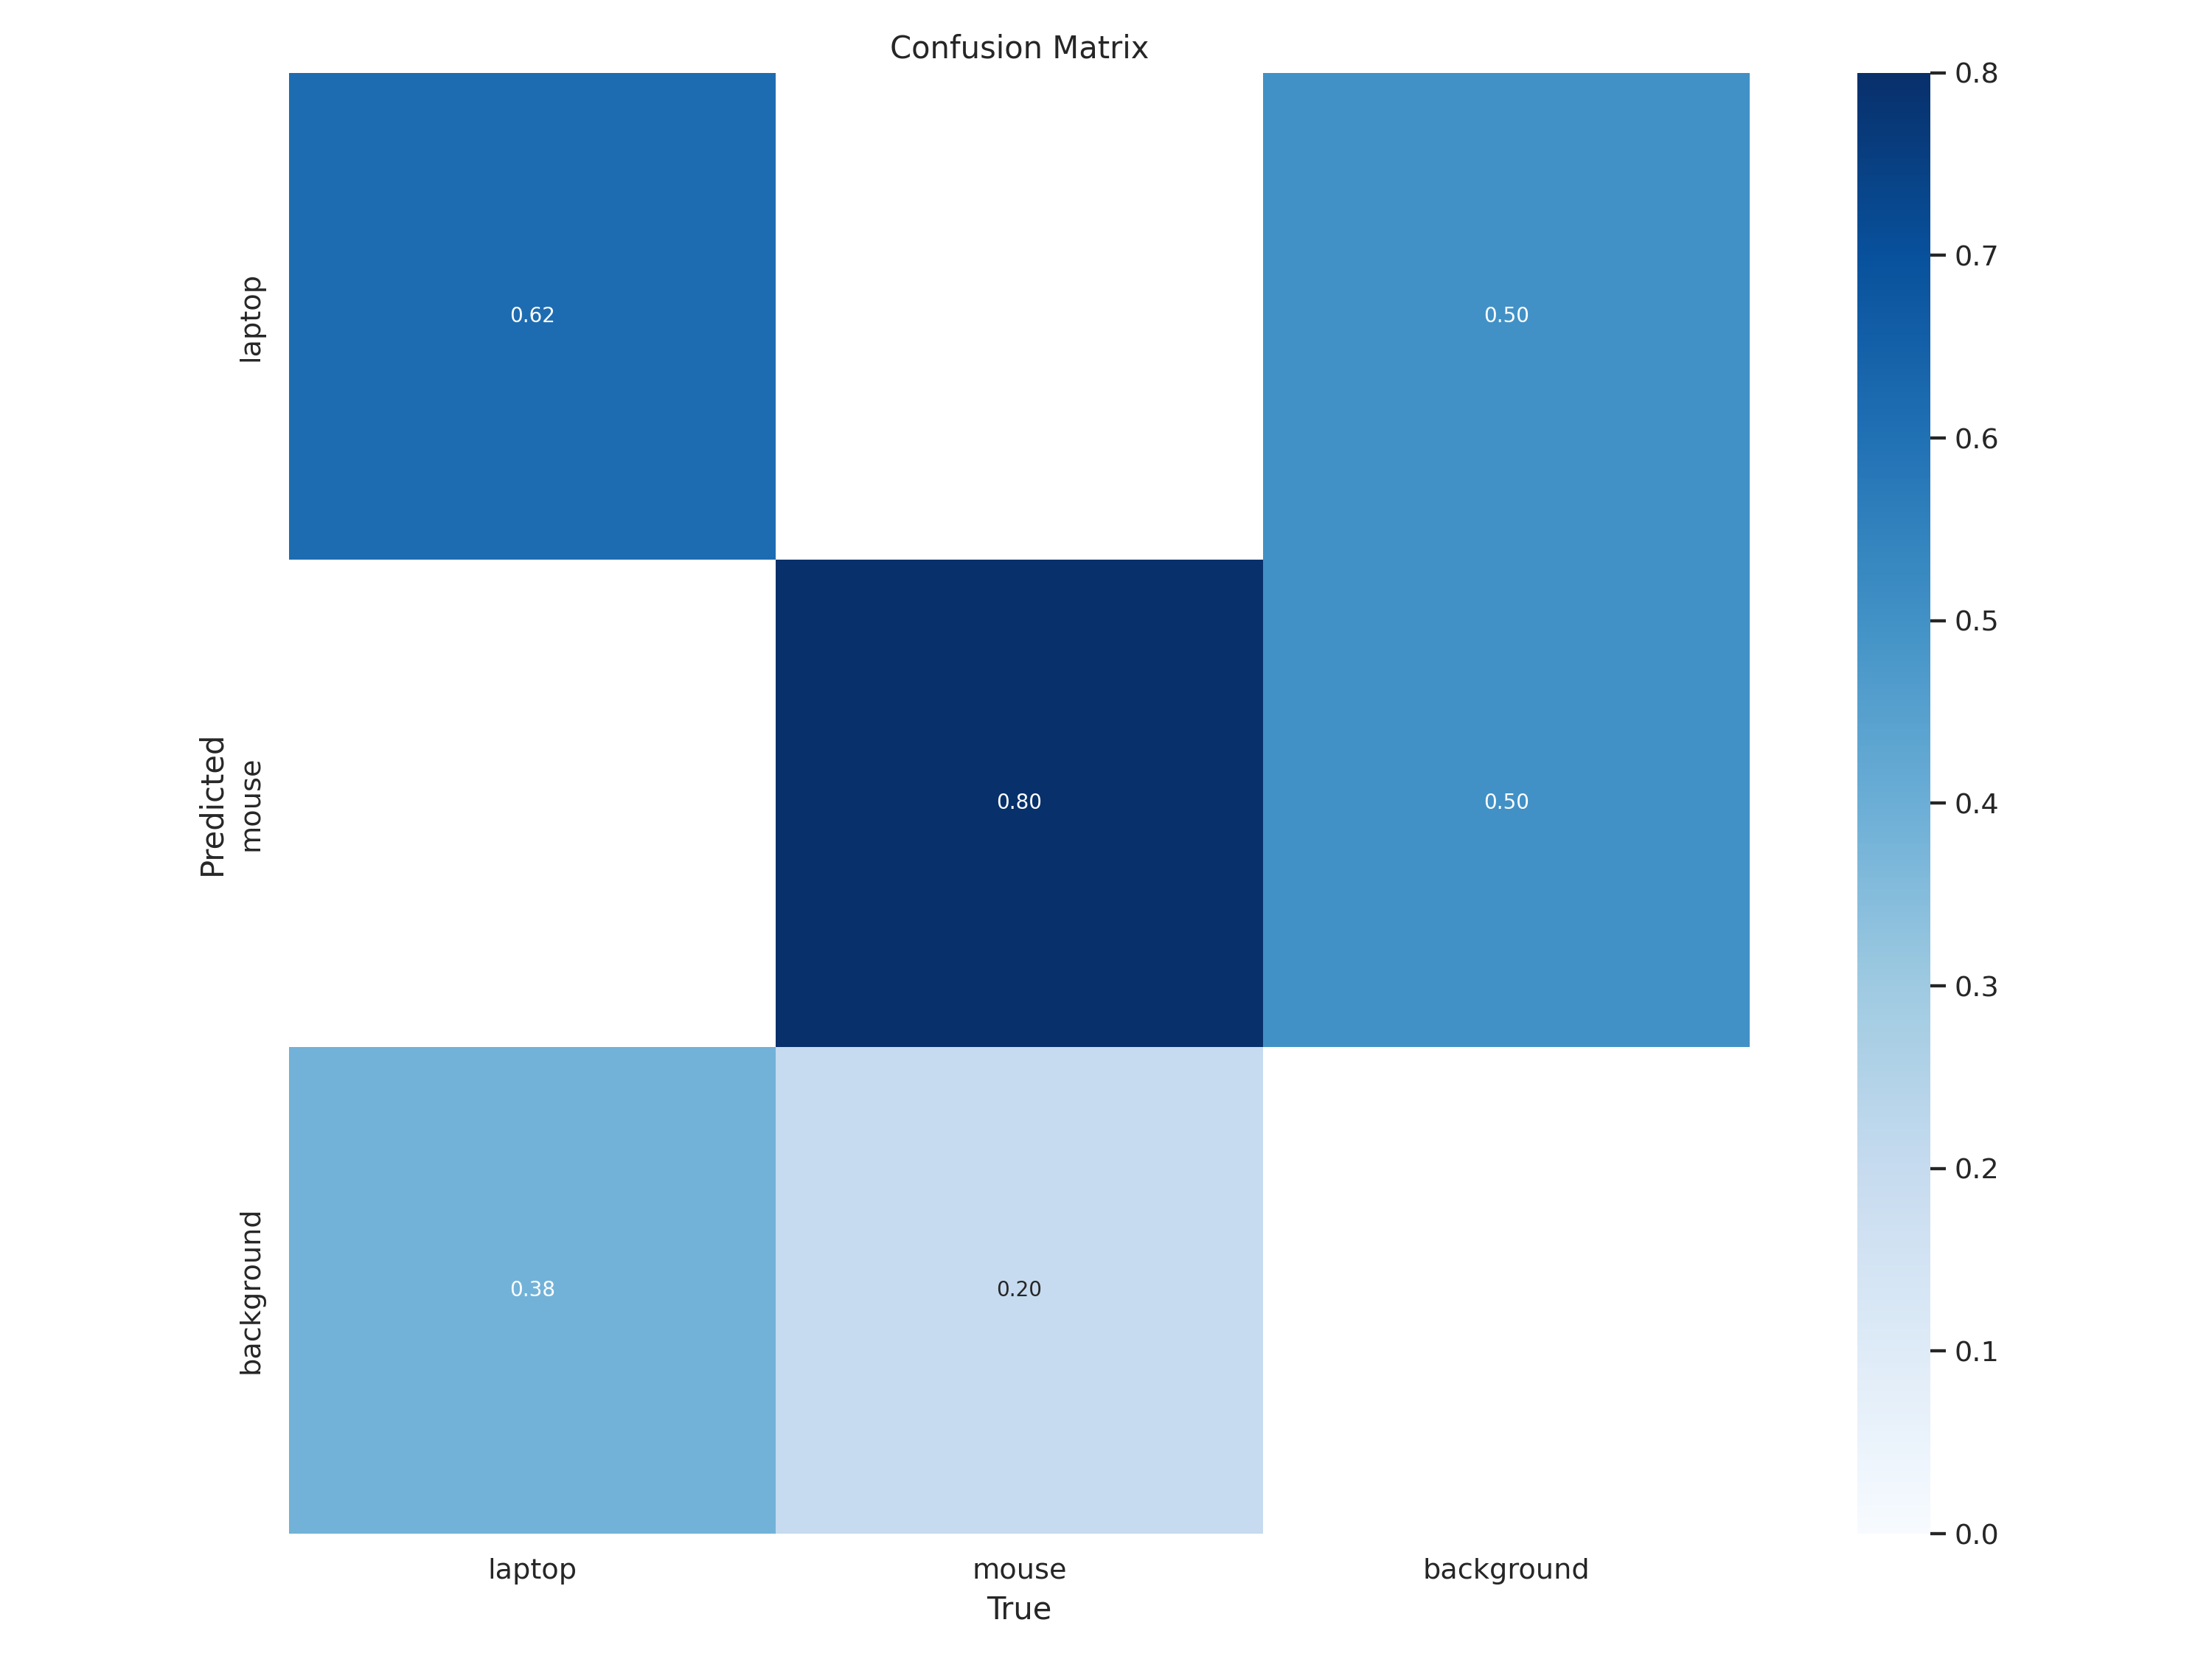

In [11]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

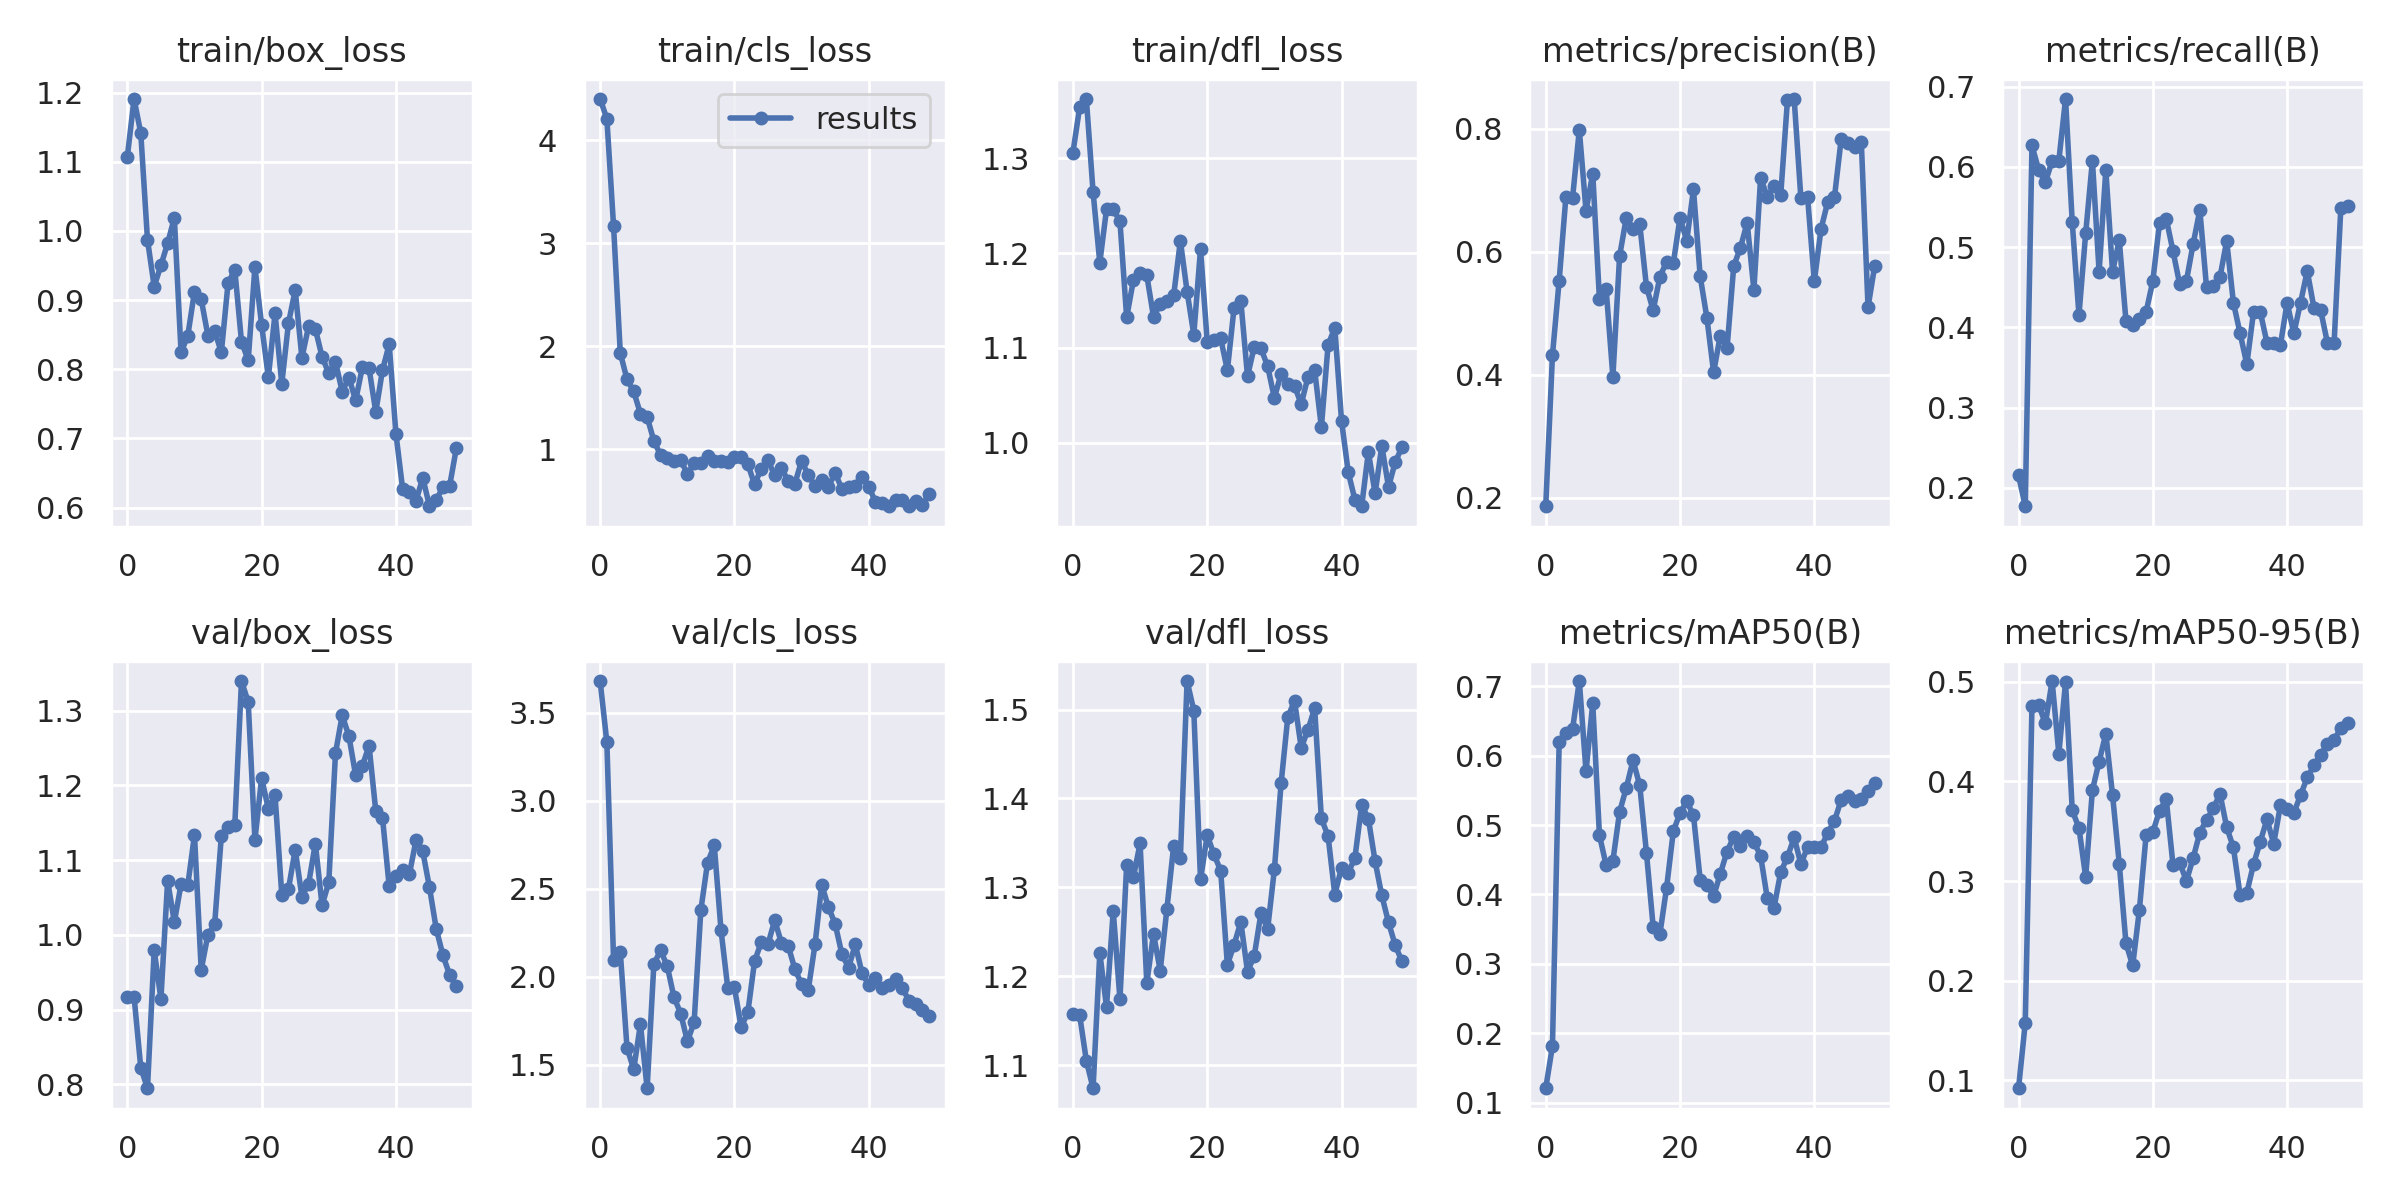

In [12]:
Image(filename='runs/detect/train/results.png', width=600)

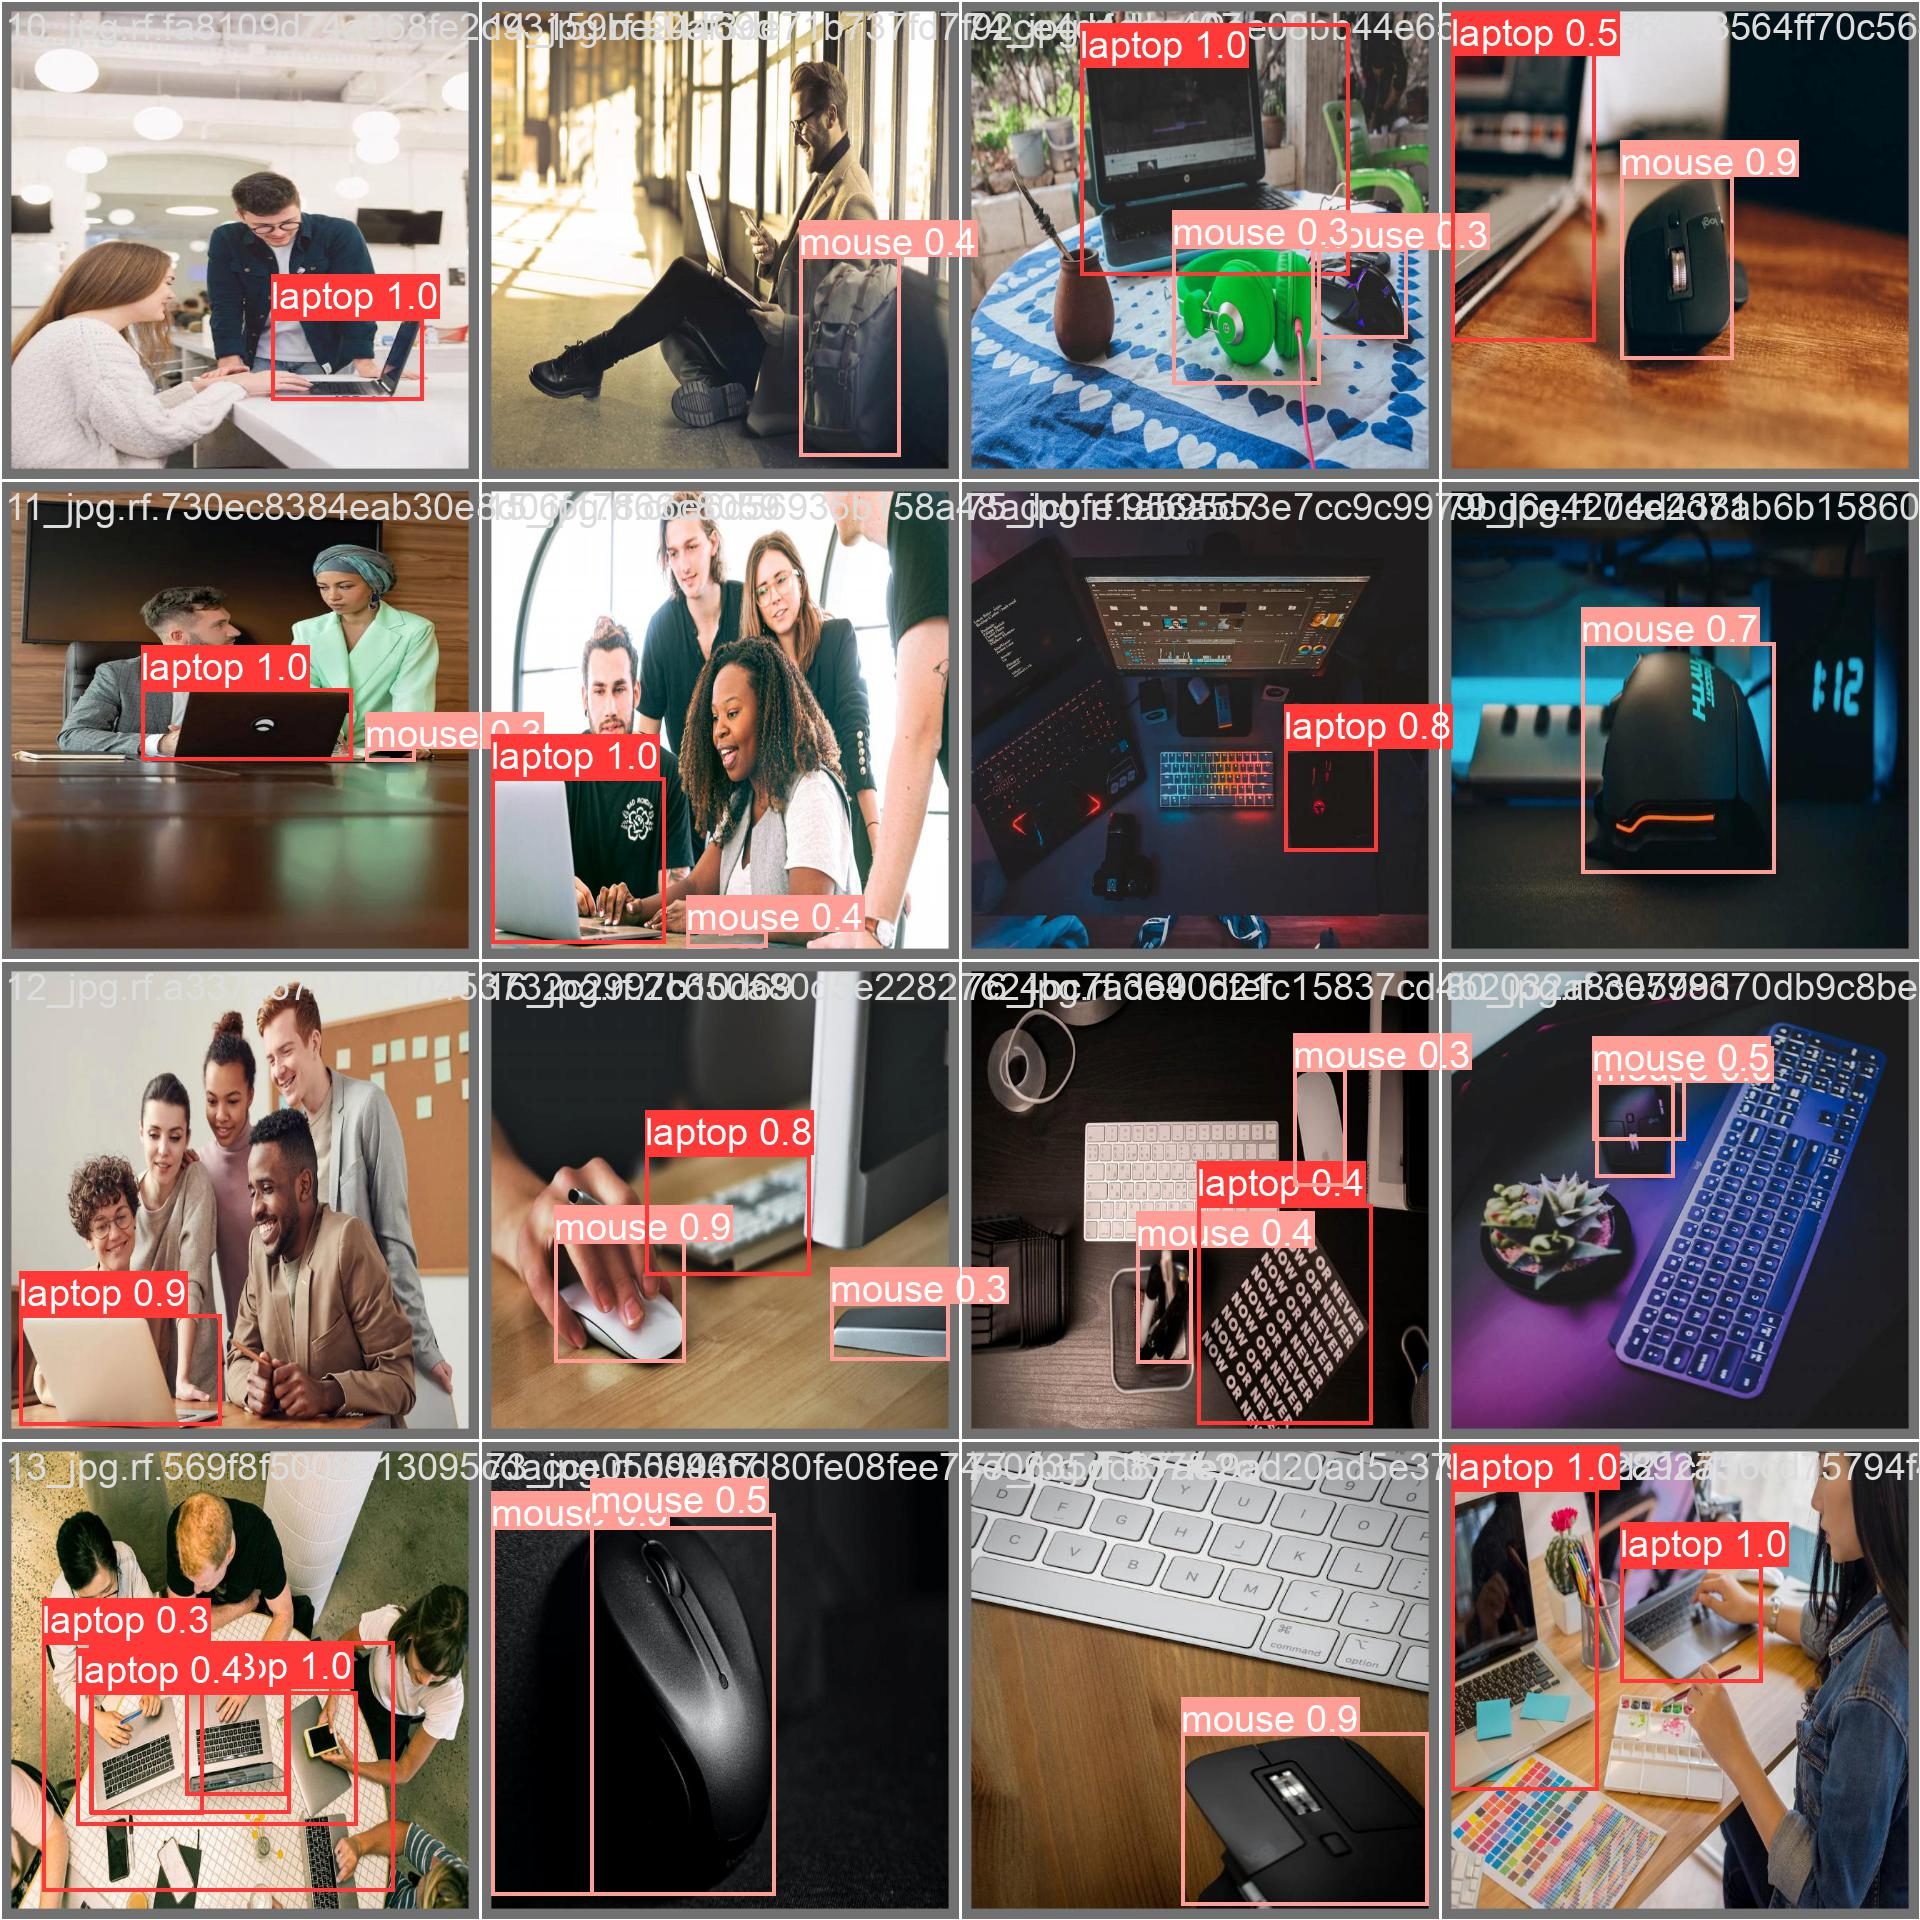

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.18it/s]
                   all         16         23      0.798      0.608      0.708      0.501
                laptop         16         13      0.635      0.615      0.691      0.526
                 mouse         16         10      0.962        0.6      0.724      0.475
Speed: 0.2ms preprocess, 16.2ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to runs/detect/val8


In [15]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=laptop_mouse_dataset/test/images save=True show=True boxes=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/8 /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/images/17_jpg.rf.9d627ccbd6382efa2ec4231975356d68.jpg: 640x640 1 laptop, 16.3ms
image 2/8 /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/images/18_jpg.rf.61ded275c8e9f78317c362e04b673ce0.jpg: 640x640 2 laptops, 16.3ms
image 3/8 /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/images/19_jpg.rf.54449d8f9604b870c641c75ac7f6948e.jpg: 640x640 2 laptops, 16.3ms
image 4/8 /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/images/20_jpg.rf.9f2c80b3717cc00862cc5e617db57026.jpg: 640x640 (no detections), 16.3ms
image 5/8 /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/images/69_jpg.rf.647ffc4a7b721e7f8f75816723cb6d6f.jpg: 640x640 2 mouses, 16.4ms
image 6/8 /content

In [17]:
!ls

data.yaml	      runs	   yolov8n.pt			  yolov8s.pt
laptop_mouse_dataset  ultralytics  yolov8-object-detection.ipynb


In [20]:
!yolo task=detect mode=val split=test model=runs/detect/train/weights/best.pt data=data.yaml 

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/labels... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:02<00:00,  3.54it/s]
val: New cache created: /content/drive/MyDrive/YOLOv8/laptop_mouse_dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.34it/s]
                   all          8         13       0.61      0.542      0.644      0.479
                laptop          8          9       0.49      0.333      0.417      0.333
                 mouse          8          4       0.73       0.75       0.87      0.626
Speed: 0.3ms preprocess, 17.0ms inference, 0.0ms loss, 14.8ms postprocess per image
Results saved to runs/detect/val10
